In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

In [2]:
#For linear regression using the statsmodel package
import statsmodels.api as stm


In [3]:
#For linear regression using the sklearn package
import scipy.stats as stats
import sklearn

In [4]:
#For finding correlation
import seaborn as sns

## Business Understanding

Let's assume we are a real estate agency in Boston and we are interested in purchasing some houses. We would like to know which houses will meet our requirements within the budget.

In [5]:
#read the csv file
boston = pd.read_csv(r"C:\Users\PRAVEEN\Downloads\Boston\boston.csv")

In [6]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001


## Understand the datatypes of variables

In [7]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


##### Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
    - PT       pupil-teacher ratio by town
    - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    - LSTAT    % lower status of the population
    - MEDV     Median value of owner-occupied homes in $1000's

## Data Cleaning

##### Count the no. of missing values in the data

In [8]:
boston.isnull().sum()

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

No NULL values are there..

## Analysing the data

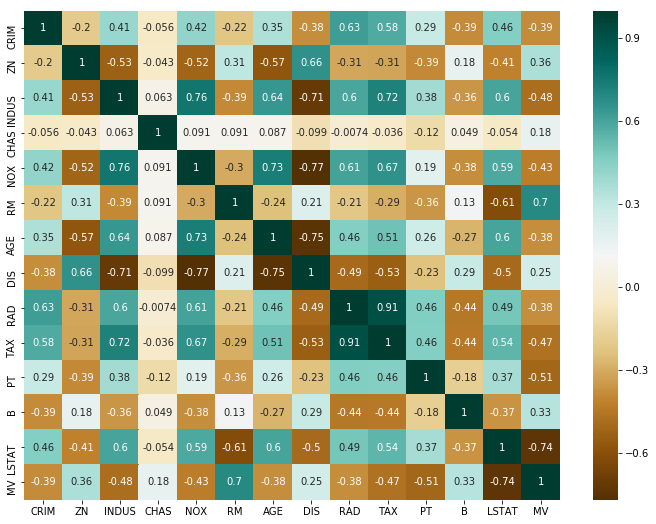

In [9]:
#Find Correlation between the Variables
plt.figure(figsize=(12,9))
sns.heatmap(boston.corr()
            ,cmap="BrBG",annot=True)

C:\Users\PRAVEEN\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


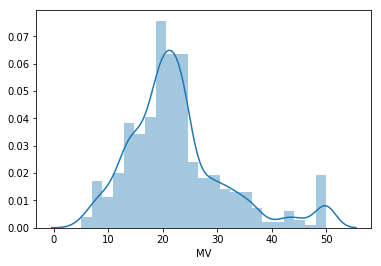

In [10]:
#Distribution of Price
sns.distplot(boston['MV'])

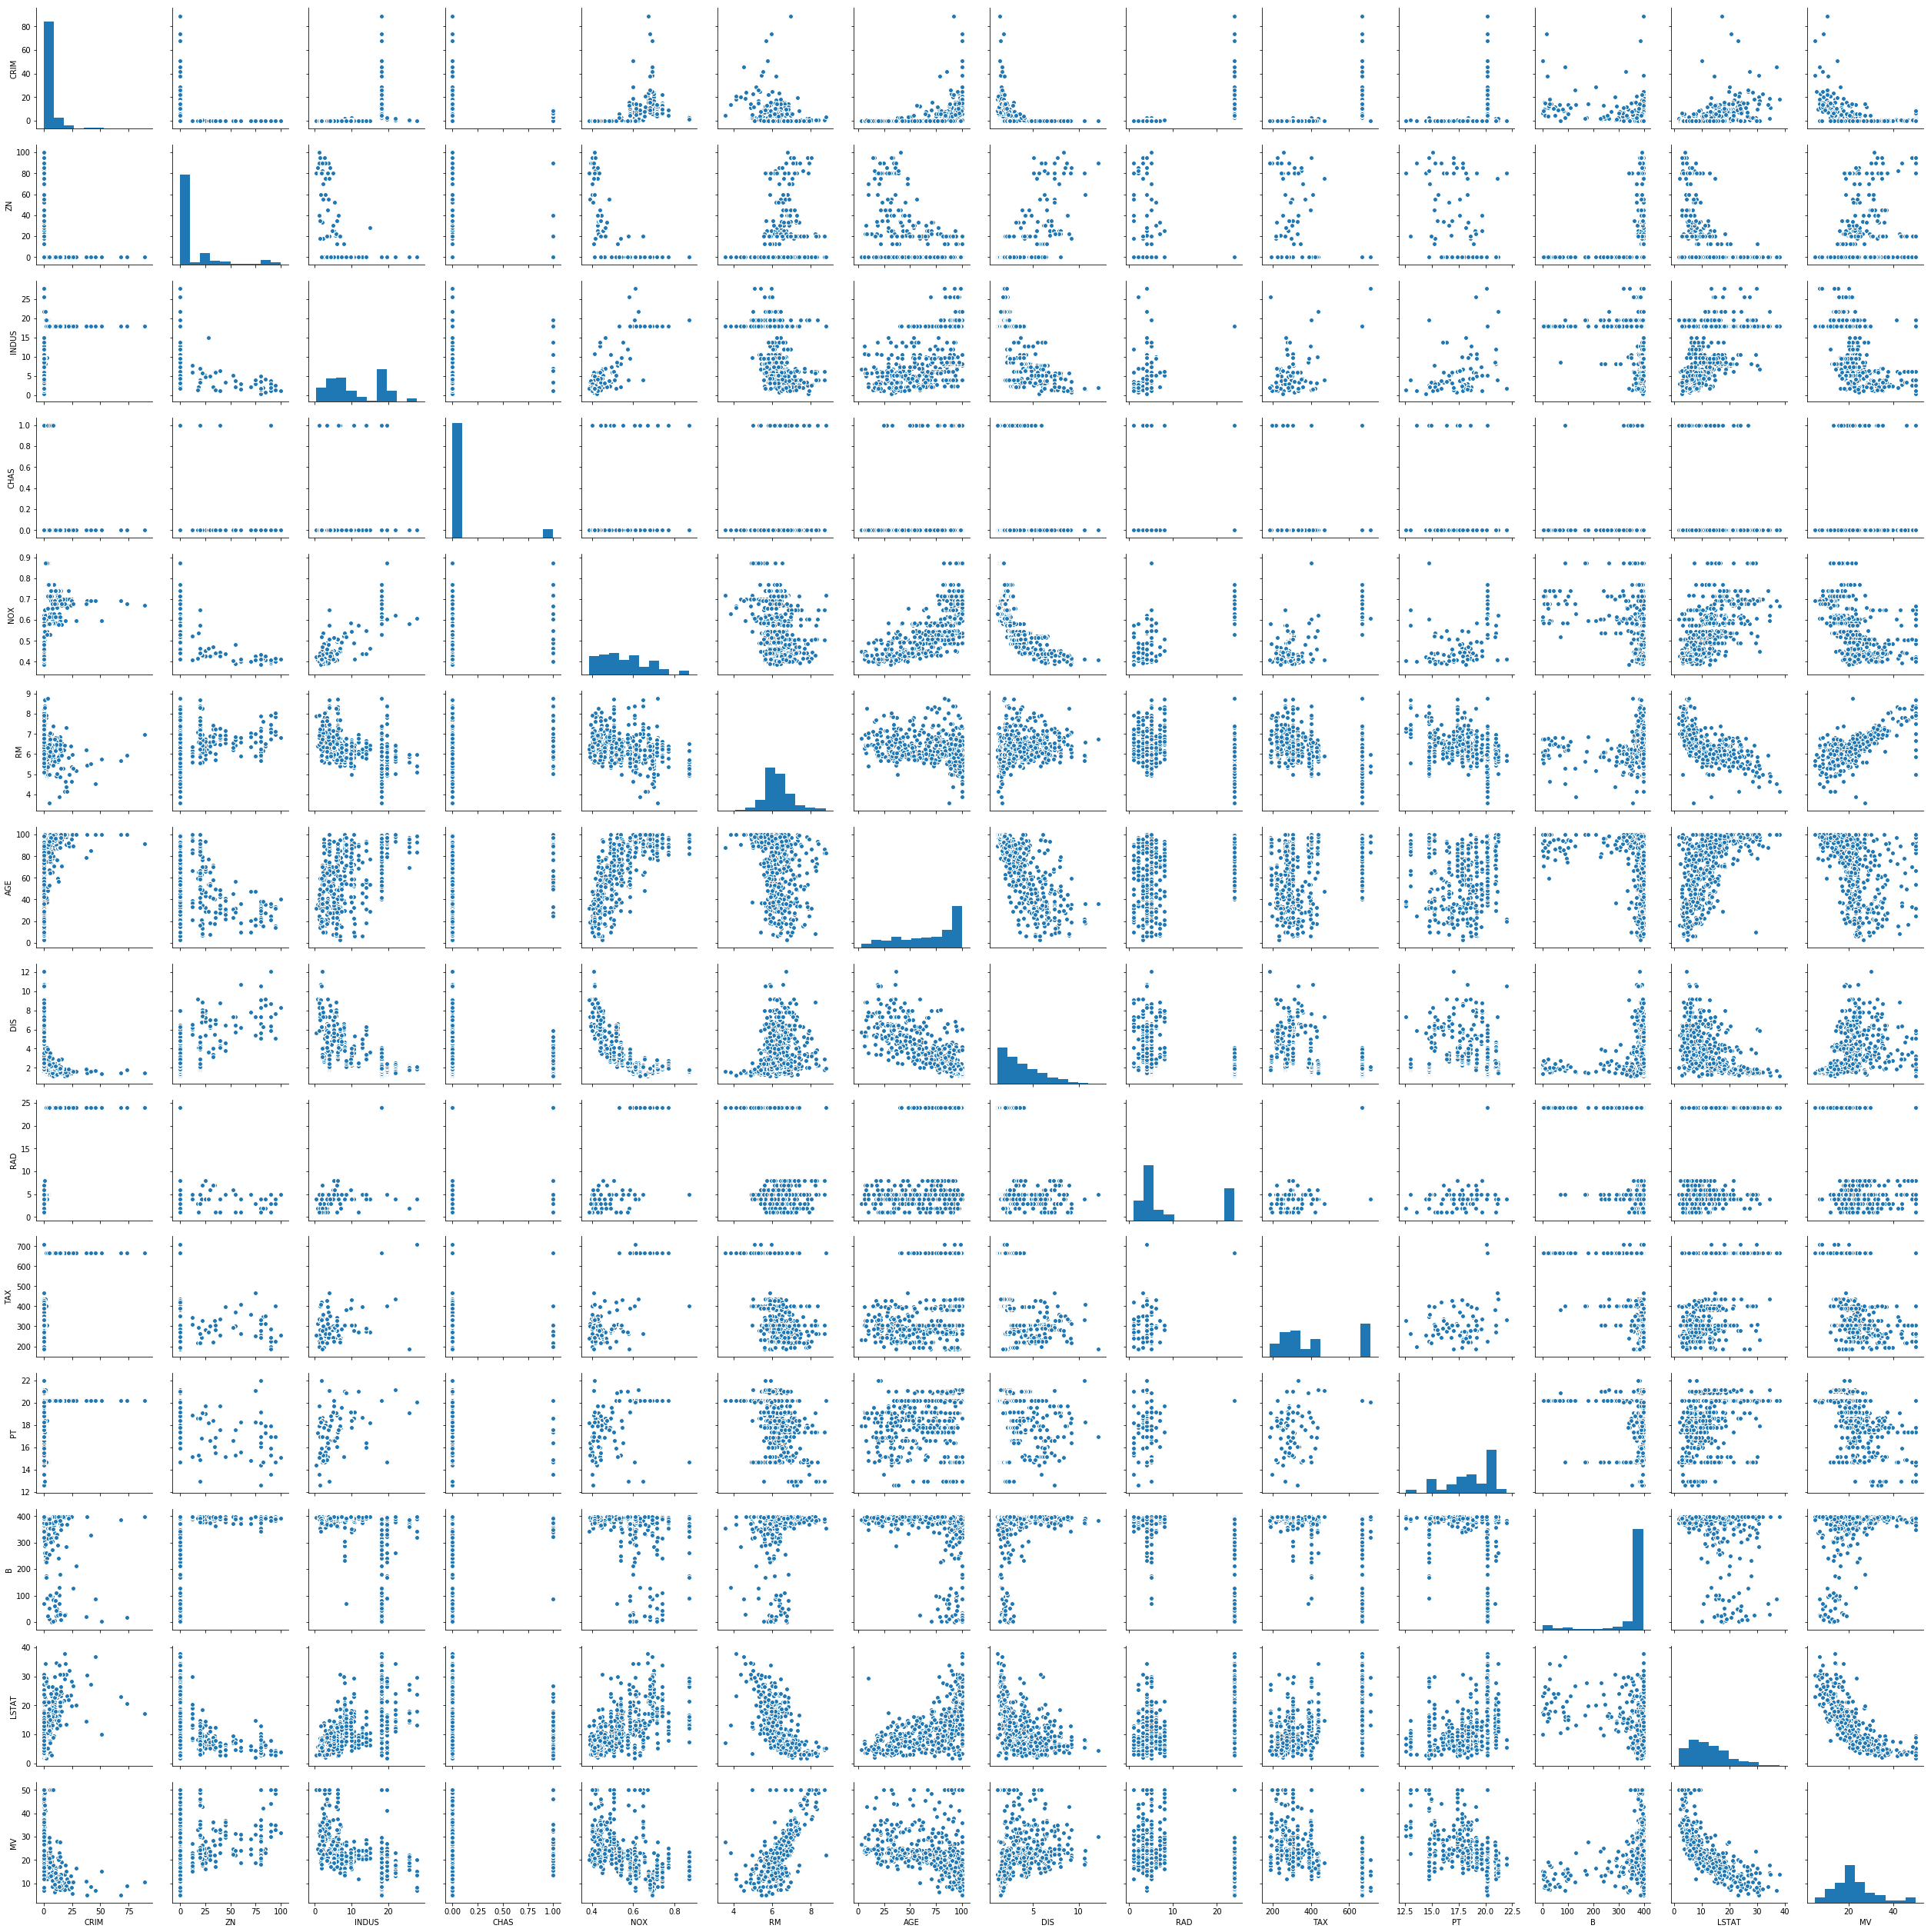

In [11]:
sns.pairplot(boston)

### Split the data into train & test

In [16]:
#Divide the data into train(70%) and test(30%)
np.random.seed(1)
train = np.random.choice(boston.index, round(.7*506), replace=False)
train.sort()
#train

In [19]:
#Train
x_train = boston.loc[train, ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PT','B','LSTAT']]
y_train = boston.loc[train, 'MV']

In [21]:
#Test
test = []
for i in list(boston.index):
    if i not in train:
        test.append(i)
        
test = np.array(test)
test.sort()

In [22]:
x_test = boston.loc[test, ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PT','B','LSTAT']]
y_test = boston.loc[test, 'MV']

In [24]:
x_train = stm.add_constant(x_train)
#x_train.head()

## Creating the Model

In [25]:
model = stm.OLS(y_train, x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     MV   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     85.18
Date:                Thu, 01 Nov 2018   Prob (F-statistic):           1.87e-98
Time:                        13:06:42   Log-Likelihood:                -1024.7
No. Observations:                 354   AIC:                             2077.
Df Residuals:                     340   BIC:                             2132.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.2868      5.793      5.919      0.000      22.892      45.682
CRIM          -0.1202      0.036     -3.341      0.001      -0.191      -0.049
ZN             0.0360      0.015      2.389      0.017       0.006       0.066
INDUS         -0.0145      0.067     -0.215      0.830      -0.147       0.118
CHAS           3.1165      1.004      3.105      0.002       1.142       5.091
NOX          -18.3801      4.714     -3.899      0.000     -27.653      -9.107
RM             4.3308      0.479      9.038      0.000       3.388       5.273
AGE           -0.0145      0.015     -0.987      0.324      -0.044       0.014
DIS           -1.5842      0.227     -6.973      0.000      -2.031      -1.137
RAD            0.2993      0.076      3.963      0.000       0.151       0.448
TAX           -0.0133      0.004     -3.153      0.002      -0.022      -0.005
PT            -0.9495      0.145     -6.556      0.000      -1.234      -0.665
B              0.0099      0.003      3.433      0.001       0.004       0.016
LSTAT         -0.4297      0.057     -7.508      0.000      -0.542      -0.317
==============================================================================
Omnibus:                      100.889   Durbin-Watson:                   1.317
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              372.754
Skew:                           1.212   Prob(JB):                     1.14e-81
Kurtosis:                       7.404   Cond. No.                     1.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Making Prediction Using the Model

In [26]:
x_test = stm.add_constant(x_test)
pred = model.predict(x_test)
pred[:10]

1     24.832781
2     30.555828
3     28.701968
7     19.511034
10    19.185892
15    18.976525
20    12.682658
22    16.160678
25    13.213186
26    15.188858
dtype: float64

In [27]:
y_test[:10]

1     21.600000
2     34.700001
3     33.400002
7     27.100000
10    15.000000
15    19.900000
20    13.600000
22    15.200000
25    13.900000
26    16.600000
Name: MV, dtype: float64

In [29]:
#RMSE
rmse = np.sqrt(sum((y_test - pred)**2)/len(y_test)-2)
rmse

5.239369201525134

### Plotting Actual Vs Predicted

Text(0,0.5,'Predicted Value')

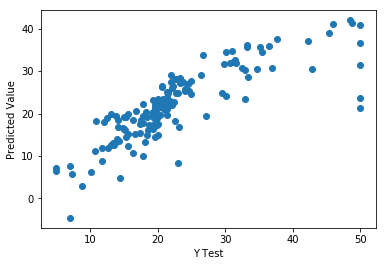

In [32]:
plt.scatter(y_test, pred)
plt.xlabel("Y Test")
plt.ylabel("Predicted Value")